<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.2_descriptives/stats_descriptives_entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Descriptive statistics
# Entropy

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

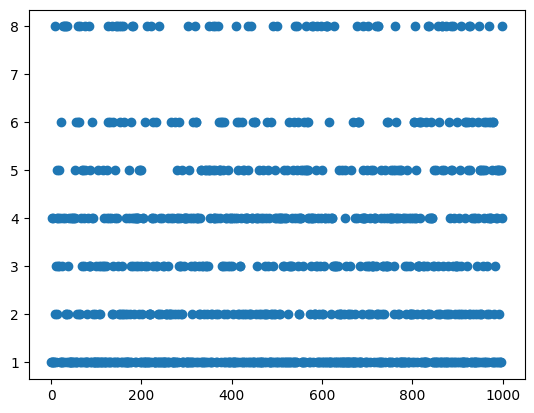

In [17]:
## "discrete" entropy

# generate data
N = 1000
numbers = np.ceil( 8*np.random.rand(N)**2 )
numbers[numbers==7] = 4
plt.plot(numbers,'o')

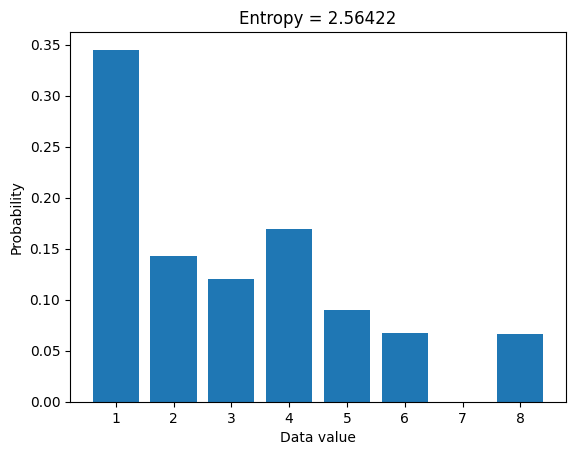

In [23]:
## "discrete" entropy

# get counts and probabilities
u = [1,2,3,4,5,6,7,8]
# u = np.unique(numbers)
probs = np.zeros(len(u))

for ui in range(len(u)):
    probs[ui] = sum(numbers==u[ui]) / N


# compute entropy
# entropee = -sum( probs*np.log2(probs) ) # divide by zero encountered in log2
entropee = -sum( probs*np.log2(probs+np.finfo(float).eps) )

# print(np.finfo(float).eps)
# print(np.log2(probs))

# plot
plt.bar(u,probs)
plt.title('Entropy = %g'%entropee)
plt.xlabel('Data value')
plt.ylabel('Probability')
plt.show()

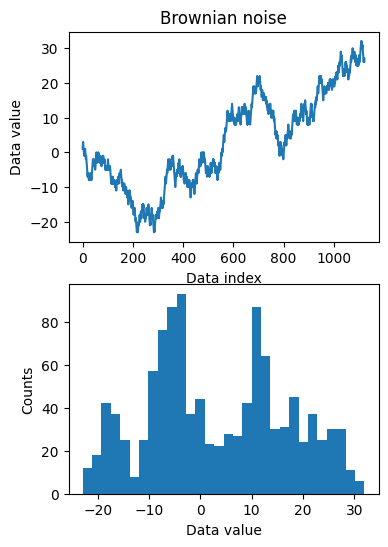

In [26]:
## for random variables

# create Brownian noise
N = 1123
brownnoise = np.cumsum( np.sign(np.random.randn(N)) )

fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(brownnoise)
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')
ax[0].set_title('Brownian noise')

ax[1].hist(brownnoise,30)
ax[1].set_xlabel('Data value')
ax[1].set_ylabel('Counts')
plt.show()

In [28]:
### now compute entropy
# number of bins
# nbins = 50
nbins = 30

# bin the data and convert to probability
nPerBin,bins = np.histogram(brownnoise,nbins)
probs = nPerBin / sum(nPerBin)

# compute entropy
entro = -sum( probs*np.log2(probs+np.finfo(float).eps) )

print('Entropy = %g'%entro)

Entropy = 4.65372


---
# Code challenge: entropy and number of bins
---

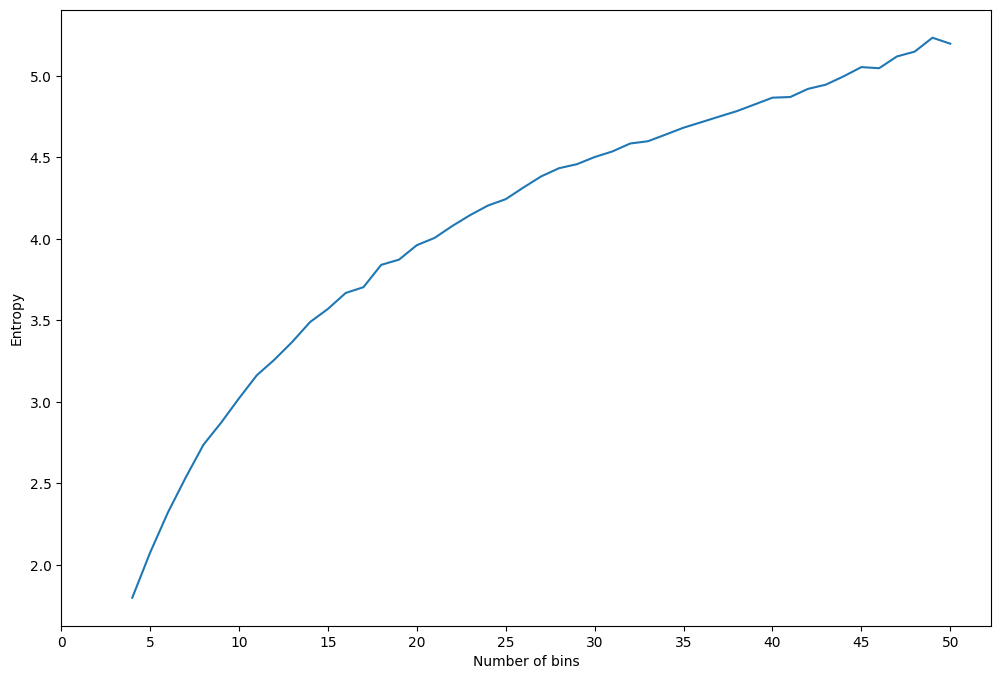

In [31]:
np.random.seed(42)

N = 1123
brownnoise = np.cumsum( np.sign(np.random.randn(N)) )

n_bins = list(range(4, 51))
entros = list()

for n in n_bins:
    nPerBin,bins = np.histogram(brownnoise,n)
    probs = nPerBin / sum(nPerBin)
    entro = -sum( probs*np.log2(probs+np.finfo(float).eps) )

    entros.append(entro)
plt.figure(figsize=(12,8))
plt.plot(n_bins,
         entros)
plt.xticks(range(0,51,5))
plt.xlabel('Number of bins')
plt.ylabel('Entropy')
plt.show()

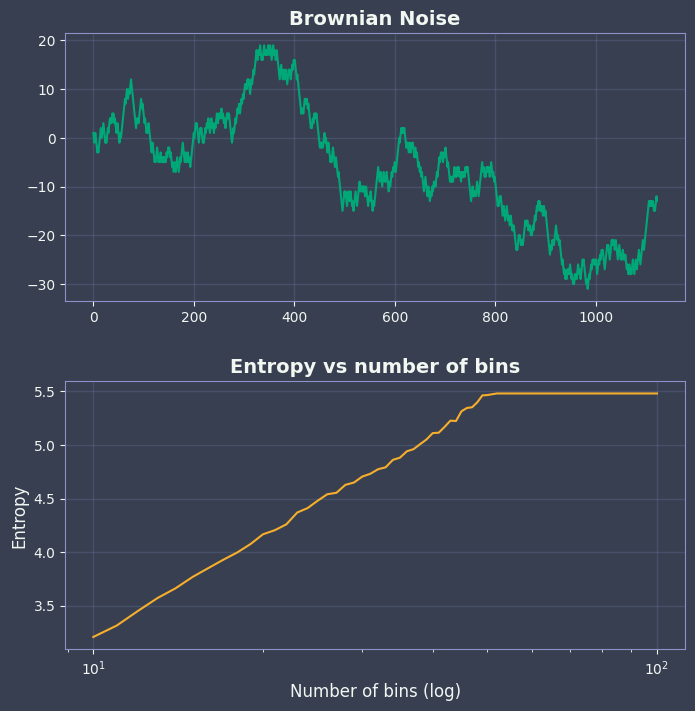

In [34]:
def entropy_from_probabilities(probs):
  return -sum( probs*np.log2(probs+np.finfo(float).eps) )

N = 1123
brownnoise = np.cumsum( np.sign(np.random.randn(N)) )
n_bins = np.logspace(1, 2, 100, dtype=int)
entropies = list()

for bin in n_bins:
  nPerBin, _ = np.histogram(brownnoise,bin)
  probs = nPerBin / sum(nPerBin)
  entropies.append(entropy_from_probabilities(probs))


fig, ax = plt.subplots(2, 1, figsize=(8,8), facecolor='#373F51')
fig.subplots_adjust(hspace=0.3)
# Plotting options
border_color = '#8D91C7'
title_options = {
    'color': '#F2F7F2',
    'fontweight': 'bold',
    'fontsize': 14
}
text_options = {
    'color': '#F2F7F2',
    'fontsize': 12
}

ax[0].plot(brownnoise, color='#00A878')
ax[0].spines['bottom'].set_color(border_color)
ax[0].spines['top'].set_color(border_color)
ax[0].spines['left'].set_color(border_color)
ax[0].spines['right'].set_color(border_color)
ax[0].tick_params(colors='#F2F7F2', which='both')
ax[0].set_facecolor('#373F51')
ax[0].grid(color=border_color, linewidth=1, alpha=0.2)
ax[0].set_title('Brownian Noise', fontdict=title_options)

ax[1].plot(n_bins, entropies, color='#F6AE2D')
ax[1].spines['bottom'].set_color(border_color)
ax[1].spines['top'].set_color(border_color)
ax[1].spines['left'].set_color(border_color)
ax[1].spines['right'].set_color(border_color)
ax[1].tick_params(colors='#F2F7F2', which='both')
ax[1].set_facecolor('#373F51')
ax[1].grid(color=border_color, linewidth=1, alpha=0.2)
ax[1].set_title('Entropy vs number of bins', fontdict=title_options)
ax[1].set_xlabel('Number of bins (log)', fontdict=text_options)
ax[1].set_ylabel('Entropy', fontdict=text_options)
ax[1].set_xscale('log')